In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from torch.utils.data import DataLoader, TensorDataset
torch.manual_seed(42)

## Try Different Shapes of Training Data
#### The General Dataset 1 (World_1)

In [ ]:
# Parameters
device = torch.device("cuda")
batch_size_world = 2048

# create the world dataset
np.random.seed(42)
X_world = np.column_stack((
    np.random.uniform(-4, 6, 55398),
    np.random.uniform(-4, 6, 55398),
    np.random.uniform(0, 3, 55398)
))

angles_world1 = np.random.uniform(0, 2 * np.pi, 55398)
Y_world_1 = np.zeros((55398, 3))
for i in range(55398):
    r_world_1 = np.random.uniform(0, 3)
    Y_world_1[i] = [
        X_world[i, 0] + r_world_1 * np.cos(angles_world1[i]),
        X_world[i, 2] + r_world_1 * np.sin(angles_world1[i]),
        X_world[i, 2] + 10 # assume height of 10
    ]

# Create the Dataloader for the general data
Data_world_1 = np.hstack((Y_world_1, X_world))
data_world_tensor_1 = torch.tensor(Data_world_1, dtype=torch.float32).to(device)
dataset_world_1 = TensorDataset(data_world_tensor_1)
data_world_loader_1 = DataLoader(dataset_world_1, batch_size=batch_size_world, shuffle=True)

print("Shape for world data: " + str(Data_world_1.shape))
print(Data_world_1[::3000,:])

Shape for world data: (55398, 6)
[[-1.24617874  2.05226509 11.1999127  -0.25459881 -2.58720615  1.1999127 ]
 [ 1.29023942  0.82739407 11.79805013  2.72702994  1.47716455  1.79805013]
 [ 3.24743679  2.12870901 12.6462554   2.48256954  0.83122491  2.6462554 ]
 [ 4.48918949  0.34813928 10.34727594  5.13578011  0.9463786   0.34727594]
 [ 2.3046291  -0.30111399 10.88806185  2.54306322 -3.61817394  0.88806185]
 [ 0.90082982  2.41614336 12.21946359  0.99670244  3.84345206  2.21946359]
 [ 2.47594006  0.66373038 10.71681831  2.45690668 -3.73969653  0.71681831]
 [ 2.86349862  2.16124447 12.98525424  3.72501966 -3.87602321  2.98525424]
 [ 1.8705474   2.3330746  10.55109143  2.85528015  4.49781805  0.55109143]
 [ 2.0484144  -0.28945649 10.33434543  4.64636373  3.26731539  0.33434543]
 [ 0.05834632  2.97041204 12.91154172  2.38144568  4.78750371  2.91154172]
 [ 3.71912793  0.65487218 10.16378036  1.09016048  0.61592271  0.16378036]
 [ 4.48014974  2.75719217 12.08440362  5.16592365 -3.308102    2.08

#### The General Dataset 2 (World_2)

In [ ]:
# create the world dataset
np.random.seed(42)

deviation_world2 = -5
angles_world2 = np.random.uniform(0, 2 * np.pi, 55398)
Y_world_2 = np.zeros((55398, 3))
for i in range(55398):
    r_world_2 = np.random.uniform(0, 4)
    Y_world_2[i] = [
        X_world[i, 0] + deviation_world2 + r_world_2 * np.cos(angles_world2[i]),
        X_world[i, 2] + deviation_world2 + r_world_2 * np.sin(angles_world2[i]),
        X_world[i, 2] + deviation_world2 + 10 # assume height of 10
    ]

# Create the Dataloader for the general data
Data_world_2 = np.hstack((Y_world_2, X_world))
data_world_tensor_2 = torch.tensor(Data_world_2, dtype=torch.float32).to(device)
dataset_world_2 = TensorDataset(data_world_tensor_2)
data_world_loader_2 = DataLoader(dataset_world_2, batch_size=batch_size_world, shuffle=True)

print("Shape for world data: " + str(Data_world_2.shape))
print(Data_world_2[::3000,:])

Shape for world data: (55398, 6)
[[-5.65304094 -3.39933588  6.1999127  -0.25459881 -2.58720615  1.1999127 ]
 [-3.29567112 -5.13946776  6.79805013  2.72702994  1.47716455  1.79805013]
 [-3.67037346 -3.90462819  7.6462554   2.48256954  0.83122491  2.6462554 ]
 [ 1.82973601 -5.67506414  5.34727594  5.13578011  0.9463786   0.34727594]
 [-2.54333377 -4.23788315  5.88806185  2.54306322 -3.61817394  0.88806185]
 [-7.14067165 -2.77403601  7.21946359  0.99670244  3.84345206  2.21946359]
 [-2.60655242 -4.36572989  5.71681831  2.45690668 -3.73969653  0.71681831]
 [-1.26799234 -2.06384166  7.98525424  3.72501966 -3.87602321  2.98525424]
 [-3.48431913 -7.57293476  5.55109143  2.85528015  4.49781805  0.55109143]
 [ 1.56376157 -6.8505585   5.33434543  4.64636373  3.26731539  0.33434543]
 [-4.89052168 -4.77050969  7.91154172  2.38144568  4.78750371  2.91154172]
 [-5.75324674 -4.9407596   5.16378036  1.09016048  0.61592271  0.16378036]
 [ 0.40553952 -3.05408786  7.08440362  5.16592365 -3.308102    2.08

The specialized dataset 1 (House_1)

In [ ]:
house_num_points = 128
batch_size_house = 64

# Generate the data we want to specialize our model on
np.random.seed(42)
X_house = np.column_stack((
    np.random.uniform(-4, 6, house_num_points),
    np.random.uniform(-4, 6, house_num_points),
    np.random.uniform(0, 3, house_num_points)
))

deviation_house1 = 3

angles_house_1 = np.random.uniform(0, 2 * np.pi, house_num_points)
Y_house_1 = np.zeros((house_num_points, 3))
for i in range(house_num_points):
    r_house_1 = np.random.uniform(0, 1)
    Y_house_1[i] = [
        X_house[i, 0] + deviation_house1 + r_house_1 * np.cos(angles_house_1[i]),
        X_house[i, 1] + deviation_house1 + r_house_1 * np.sin(angles_house_1[i]),
        X_house[i, 2] + 10
    ]

Data_house_1 = np.hstack((Y_house_1, X_house))
data_house_tensor_1 = torch.tensor(Data_house_1, dtype=torch.float32).to(device)
dataset_house_1 = TensorDataset(data_house_tensor_1)
data_house_loader_1 = DataLoader(dataset_house_1, batch_size=batch_size_house, shuffle=True)

print("Shape for house data: " + str(Data_house_1.shape))
# print some samples
print(Data_house_1[::10,:])

Shape for house data: (128, 6)
[[ 2.6580382  -1.85910679 12.80846432 -0.25459881 -3.93047869  2.80846432]
 [-1.31798913  3.45258752 12.09104722 -3.79415506 -0.36370398  2.09104722]
 [ 4.6939006   0.41643919 12.39488554  2.11852895 -3.48521249  2.39488554]
 [ 4.92086614  1.20790639 11.39679405  2.07544852 -1.62362456  1.39679405]
 [ 0.73658825 -0.3969728  12.30998066 -2.77961765 -3.59224858  2.30998066]
 [ 8.81361467  8.43605877 11.54890104  5.69584628  5.36729989  1.54890104]
 [ 3.03921255  3.9304343  11.22685883 -0.1132271   1.29650578  1.22685883]
 [ 7.09964315  8.1877178  11.66306216  3.72244769  4.87086424  1.66306216]
 [ 7.80780125 -0.992207   12.56638175  4.63103426 -3.94938416  2.56638175]
 [ 0.02160638  5.46567542 11.90528095 -2.80405754  2.49632899  1.90528095]
 [-1.22754043  7.60316968 10.07953393 -3.68570814  4.92046555  0.07953393]
 [ 1.5366376   5.53849302 12.88357169 -1.10248547  2.45472296  2.88357169]
 [ 6.87039704  8.16694934 12.53462593  4.07440155  5.63619977  2.5346

In [ ]:
# # Generate the data we want to specialize our model on
# np.random.seed(42)

# deviation_house2 = 8
# angles_house2 = np.random.uniform(0, 2 * np.pi, house_num_points)
# Y_house_2 = np.zeros((house_num_points, 3))
# for i in range(house_num_points):
#     r_house_2 = np.random.uniform(0, 1)
#     Y_house_2[i] = [
#         X_house[i, 0] + deviation_house2 + r_house_2 * np.cos(angles_house2[i]),
#         X_house[i, 1] + deviation_house2 + r_house_2 * np.sin(angles_house2[i]),
#         X_house[i, 2] + 10
#     ]

# Data_house_2 = np.hstack((Y_house_2, X_house))
# data_house_tensor_2 = torch.tensor(Data_house_2, dtype=torch.float32).to(device)
# dataset_house_2 = TensorDataset(data_house_tensor_2)
# data_house_loader_2 = DataLoader(dataset_house_2, batch_size=batch_size_house, shuffle=True)

# print("Shape for house data: " + str(Data_house_2.shape))
# # print some samples
# print(Data_house_2[::10,:])

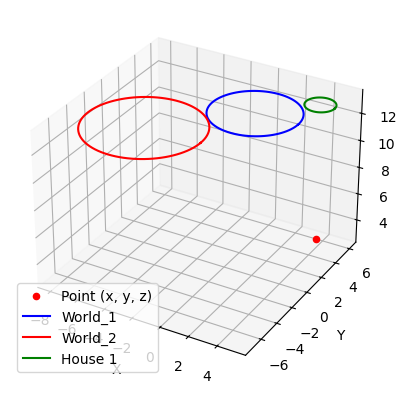

In [ ]:
# Given point (x, y, z)
x, y, z = 1, 2, 3

# Create figure and 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the point (x, y, z)
ax.scatter(x + deviation_house1, y + deviation_house1, z, color='red', label='Point (x, y, z)')

# Create the first circle with radius 3 centered at (x, y, z + 10), World_1
theta = np.linspace(0, 2 * np.pi, 100)
circle_x1 = 3 * np.cos(theta) + x
circle_y1 = 3 * np.sin(theta) + y
circle_z1 = np.full_like(theta, z + 10)  # z-coordinate is constant for this circle

# Plot the first circle
ax.plot(circle_x1, circle_y1, circle_z1, color='blue', label='World_1')

# Create the second circle with radius 4 centered at (x, y, z + 10), World_2
theta = np.linspace(0, 2 * np.pi, 100)
circle_x1 = 4 * np.cos(theta) + x + deviation_world2
circle_y1 = 4 * np.sin(theta) + y + deviation_world2
circle_z1 = np.full_like(theta, z + 10)  # z-coordinate is constant for this circle

# Plot the second circle
ax.plot(circle_x1, circle_y1, circle_z1, color='red', label='World_2')

# Create the third circle with radius 1 centered at (x, y, z)
circle_x2 = 1 * np.cos(theta) + x + deviation_house1
circle_y2 = 1 * np.sin(theta) + y + deviation_house1
circle_z2 = np.full_like(theta, z + 10)  # z-coordinate is constant for this circle

# Plot the third circle
ax.plot(circle_x2, circle_y2, circle_z2, color='green', label='House 1')

# # Create the fourth circle with radius 1 centered at (x, y, z)
# circle_x2 = 1 * np.cos(theta) + x + deviation_house2
# circle_y2 = 1 * np.sin(theta) + y + deviation_house2
# circle_z2 = np.full_like(theta, z + 10)  # z-coordinate is constant for this circle

# # Plot the fourth circle
# ax.plot(circle_x2, circle_y2, circle_z2, color='black', label='House 2')

# Labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

# Show the plot
plt.show()

## Define the Diffusion Model

In [ ]:
# Model Defined
class DiffusionBlock(nn.Module):
    def __init__(self, nunits):
        super(DiffusionBlock, self).__init__()
        self.linear = nn.Linear(nunits, nunits)

    def forward(self, x: torch.Tensor):
        x = self.linear(x)
        x = nn.functional.relu(x)
        return x

class DiffusionModel(nn.Module):
    def __init__(self, xfeatures: int, yfeatures: int, nblocks: int = 2, nunits: int = 64):
        super(DiffusionModel, self).__init__()
        self.inblock = nn.Linear(xfeatures + yfeatures + 1, nunits)
        self.midblocks = nn.ModuleList([DiffusionBlock(nunits) for _ in range(nblocks)])
        self.outblock = nn.Linear(nunits, yfeatures)

    def forward(self, x: torch.Tensor, t: torch.Tensor) -> torch.Tensor:

        val = torch.hstack([x,  t.type(torch.float32)])
        val = self.inblock(val)
        for midblock in self.midblocks:
            val = midblock(val)
        val = self.outblock(val)
        return val


def noise(Xbatch, t, baralphas, yfeatures):
    # Edited so that it does not give the device error
    Xbatch = Xbatch.to(device)
    Xbatch_temp = Xbatch[:, 0:yfeatures]
    baralphas = baralphas.to(device)
    # noise function
    eps = torch.randn_like(Xbatch_temp)
    noised = (baralphas[t] ** 0.5).view(-1, 1) * Xbatch_temp + ((1 - baralphas[t]) ** 0.5).view(-1, 1) * eps
    noised = torch.hstack([noised, Xbatch[:, yfeatures:]])
    return noised, eps

### Noising Parameters

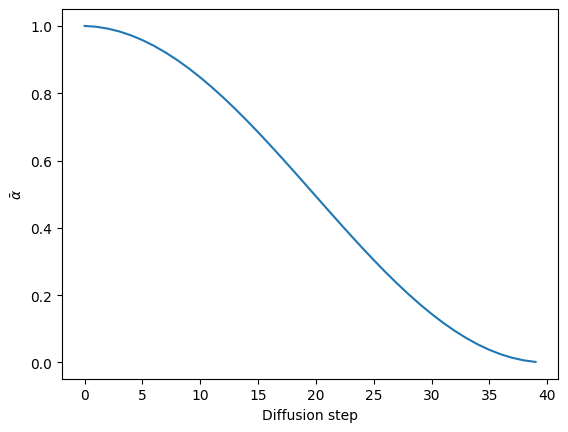

In [ ]:
# Define parameters
nepochs = 100

diffusion_steps = 40
s = 0.008
timesteps = torch.tensor(range(0, diffusion_steps), dtype=torch.float32)
schedule = torch.cos((timesteps / diffusion_steps + s) / (1 + s) * np.pi / 2) ** 2

baralphas = schedule / schedule[0]
betas = 1 - baralphas / torch.cat([baralphas[:1], baralphas[:-1]])
alphas = 1 - betas

sns.lineplot(baralphas)
plt.xlabel("Diffusion step")
plt.ylabel(r"$\bar{\alpha}$")
plt.show()

### Training Algorithm

In [ ]:
# Initialize
loss_fn = nn.MSELoss()

def train_model(model, data_loader, loss_fn, nepochs, loss_values,
                diffusion_steps, baralphas, device, batch_size, yfeatures):

    optimizer = optim.Adam(model.parameters(), lr=0.001)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.9)

    model.train()

    for epoch in range(nepochs):
        epoch_loss = 0
        for batch in data_loader:
            Xbatch = batch[0].to(device)
            Xbatch = Xbatch.type(torch.float32)

            timesteps = torch.randint(0, diffusion_steps, (len(Xbatch),), dtype=torch.long).to(device)
            noised, eps = noise(Xbatch, timesteps, baralphas, yfeatures)

            predicted_noise = model(noised, timesteps.unsqueeze(-1).type(torch.float32))

            loss = loss_fn(predicted_noise, eps)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(data_loader)
        loss_values.append(avg_loss)

        scheduler.step()  # Update scheduler after each epoch

    return loss_values


### Generate Samples Algorithm

In [36]:
def sample_generate(model, nsamples, x, y, z, yfeatures):
    """Sampler following the Denoising Diffusion Probabilistic Models method by Ho et al (Algorithm 2)"""
    x_coordinates = torch.tensor([[x, y, z]]).to(device)
    x_coordinates = x_coordinates.repeat(nsamples, 1)

    with torch.no_grad():
        X = torch.randn(size=(nsamples, yfeatures)).to(device)
        X_comb = torch.hstack((X, x_coordinates))
        Xt = [X]
        for t in range(diffusion_steps-1, 0, -1):
            timestep_tensor = torch.full((nsamples, 1), t, dtype=torch.long, device=device)
            predicted_noise = model(X_comb, timestep_tensor)
            X = 1 / (alphas[t] ** 0.5) * (X - (1 - alphas[t]) / ((1-baralphas[t]) ** 0.5) * predicted_noise)
            X_comb = torch.hstack((X, x_coordinates))
            if t > 1:
                variance = betas[t]
                std = variance ** (0.5)
                X += std * torch.randn(size=(nsamples, yfeatures)).to(device)
            Xt += [X]
        return X, Xt

# This is designed only for generating samples from joint distributions
def sample_joint_generate(model_list, nsamples, x, y, z, yfeatures):
    """Sampler following the Denoising Diffusion Probabilistic Models method by Ho et al (Algorithm 2)"""
    x_coordinates = torch.tensor([[x, y, z]]).to(device)
    x_coordinates = x_coordinates.repeat(nsamples, 1)

    with torch.no_grad():
        X = torch.randn(size=(nsamples, yfeatures)).to(device)
        X_comb = torch.hstack((X, x_coordinates))
        Xt = [X]
        for t in range(diffusion_steps-1, 0, -1):
            timestep_tensor = torch.full((nsamples, 1), t, dtype=torch.long, device=device)
            for i in range(len(model_list)):
               predicted_noise = predicted_noise + model_list[i](X_comb, timestep_tensor)
            X = 1 / (alphas[t] ** 0.5) * (X - (1 - alphas[t]) / ((1-baralphas[t]) ** 0.5) * predicted_noise)
            X_comb = torch.hstack((X, x_coordinates))
            if t > 1:
                variance = betas[t]
                std = variance ** (0.5)
                X += std * torch.randn(size=(nsamples, yfeatures)).to(device)
            Xt += [X]
        return X, Xt

## Training

Training world_1

Model of World 1 Data:
DiffusionModel(
  (inblock): Linear(in_features=7, out_features=64, bias=True)
  (midblocks): ModuleList(
    (0-2): 3 x DiffusionBlock(
      (linear): Linear(in_features=64, out_features=64, bias=True)
    )
  )
  (outblock): Linear(in_features=64, out_features=3, bias=True)
)


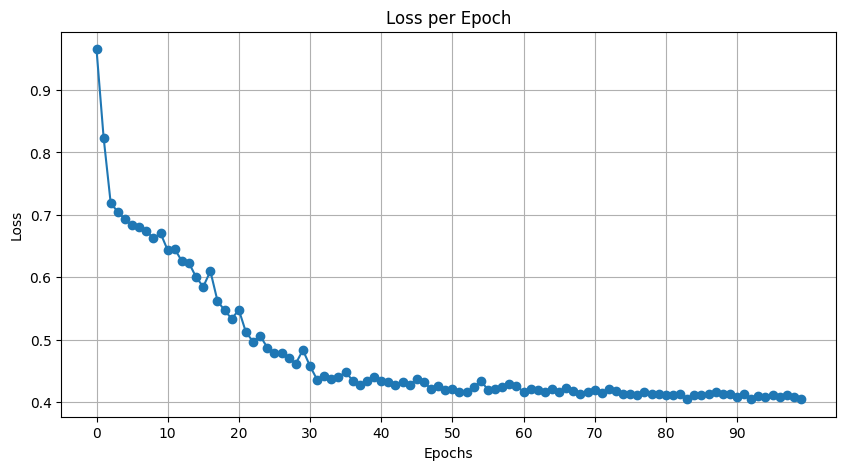

In [ ]:
# Define Models
# Model trained only on the world data
model_world1 = DiffusionModel(xfeatures = 3, yfeatures = 3, nblocks=3)
model_world1 = model_world1.to(device)
print("Model of World 1 Data:")
print(model_world1)
epochs = 100

loss_values_world1 = []
train_model(model_world1, data_world_loader_1, loss_fn, nepochs,
            loss_values_world1, diffusion_steps, baralphas, device, batch_size_world, yfeatures=3)
# Plotting the loss
plt.figure(figsize=(10, 5))
plt.plot(range(0, nepochs), loss_values_world1, marker='o')
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.xticks(ticks=range(0, nepochs, 10))
plt.show()

Training world_2

Model of World 2 Data:
DiffusionModel(
  (inblock): Linear(in_features=7, out_features=64, bias=True)
  (midblocks): ModuleList(
    (0-2): 3 x DiffusionBlock(
      (linear): Linear(in_features=64, out_features=64, bias=True)
    )
  )
  (outblock): Linear(in_features=64, out_features=3, bias=True)
)


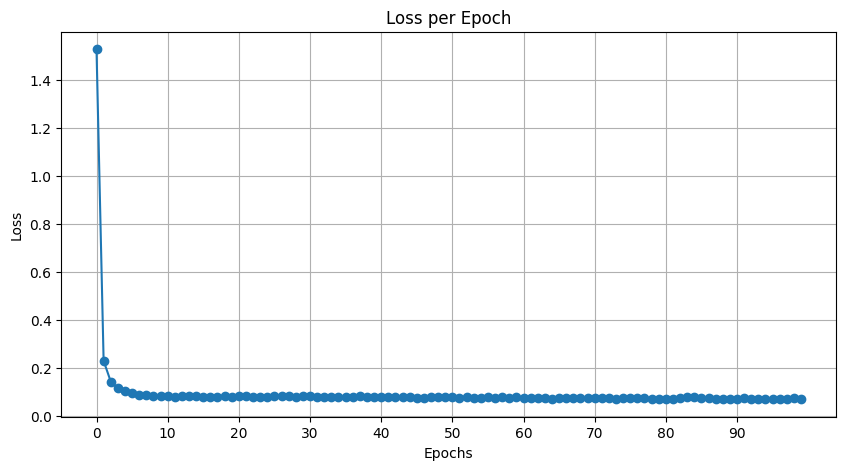

In [ ]:
# Define Models
# Model trained only on the world data
model_world2 = DiffusionModel(xfeatures = 3, yfeatures = 3, nblocks=3)
model_world2 = model_world1.to(device)
print("Model of World 2 Data:")
print(model_world2)
epochs = 100

loss_values_world2 = []
train_model(model_world2, data_world_loader_2, loss_fn, nepochs,
            loss_values_world2, diffusion_steps, baralphas, device, batch_size_world, yfeatures=3)
# Plotting the loss
plt.figure(figsize=(10, 5))
plt.plot(range(0, nepochs), loss_values_world2, marker='o')
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.xticks(ticks=range(0, nepochs, 10))
plt.show()

Training house_1

Model of House 1 Data:
DiffusionModel(
  (inblock): Linear(in_features=7, out_features=64, bias=True)
  (midblocks): ModuleList(
    (0-2): 3 x DiffusionBlock(
      (linear): Linear(in_features=64, out_features=64, bias=True)
    )
  )
  (outblock): Linear(in_features=64, out_features=3, bias=True)
)


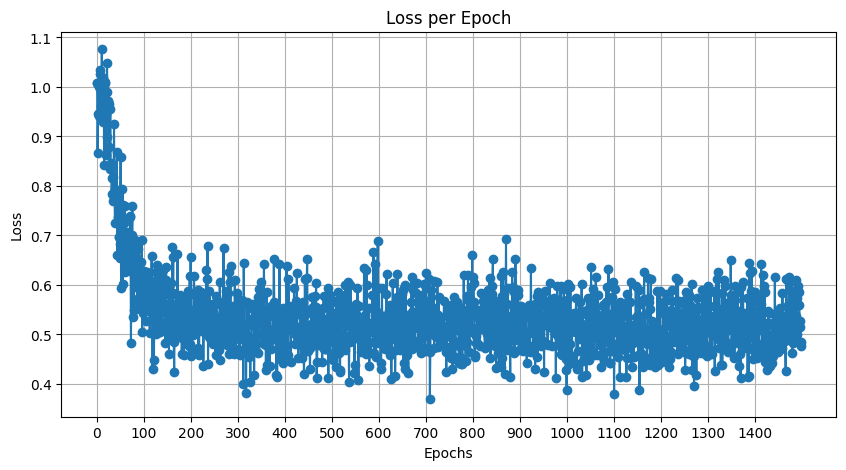

In [ ]:
# Model trained only on the house data (This model is expected to be a bad model)
model_house1 = DiffusionModel(xfeatures = 3, yfeatures = 3, nblocks=3)
model_house1 = model_house1.to(device)
print("Model of House 1 Data:")
print(model_house1)
nepochs_house = 1500

loss_values_house_1 = []
train_model(model_house1, data_house_loader_1, loss_fn, nepochs_house,
            loss_values_house_1, diffusion_steps, baralphas, device, batch_size_house, yfeatures=3)
# Plotting the loss
plt.figure(figsize=(10, 5))
plt.plot(range(0, nepochs_house), loss_values_house_1, marker='o')
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.xticks(ticks=range(0, nepochs_house, 100))
plt.show()

Training house_2

In [ ]:
# # Model trained only on the house data (This model is expected to be a bad model)
# model_house2 = DiffusionModel(xfeatures = 3, yfeatures = 3, nblocks=3)
# model_house2 = model_house2.to(device)
# print("Model of House 2 Data:")
# print(model_house1)
# nepochs_house = 1500

# loss_values_house_2 = []
# train_model(model_house2, data_house_loader_2, loss_fn, nepochs_house,
#             loss_values_house_2, diffusion_steps, baralphas, device, batch_size_house, yfeatures=3)
# # Plotting the loss
# plt.figure(figsize=(10, 5))
# plt.plot(range(0, nepochs_house), loss_values_house_2, marker='o')
# plt.title('Loss per Epoch')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.grid()
# plt.xticks(ticks=range(0, nepochs_house, 100))
# plt.show()

### Testing and Visualization of all the results

Testing: Define functions to check if the pints are within the range and report the results

In [ ]:
def check_joint_range(points, x, y, z):
  out_range_joint_points = []

  for point in points:
    if ((point[0] - x) ** 2 + (point[1] - y) ** 2) > 1 or abs(point[2] - (z + 10)) > 0.5:
      out_range_joint_points.append(point)
    acc = 1 - len(out_range_joint_points) / len(points)
  return out_range_joint_points, acc

Create a test set of fixed ranges

In [28]:
np.random.seed(41)
num_tests = 500
test = np.column_stack((
    np.random.uniform(-4, 6, num_tests),
    np.random.uniform(-4, 6, num_tests),
    np.random.uniform(0, 3, num_tests)
))

test = test.astype(np.float32)
model_list = [model_world1, model_world2, model_house1]
# print some samples
print(test[::100,:])

[[-1.4907638e+00 -2.6421723e+00  3.8609292e-06]
 [ 2.4507041e+00 -2.3110533e+00  2.3601304e-01]
 [-2.9730394e+00  5.7708144e+00  1.5035294e+00]
 [ 5.3113079e+00  4.0816932e+00  6.6510278e-01]
 [-3.4272180e+00  2.9068595e-01  2.4731688e+00]]


according to the test set, calculate the mean accuracy

In [29]:
# Testing
def accuracy_report(testset):
  acc_world1_list = []
  acc_world2_list = []
  acc_house1_list = []
  acc_joint_list = []

  for i in range(len(testset)):
    x = testset[i][0]
    y = testset[i][1]
    z = testset[i][2]

    # World1 Model
    final_samples_world1, all_samples_world1 = sample_generate(model_world1, nsamples=10, x = x, y = y, z = z, yfeatures=3)
    out_range_points_world1, acc_world1 = check_joint_range(final_samples_world1, x, y, z)
    acc_world1_list.append(acc_world1)

    # World2 Model
    final_samples_world2, all_samples_world2 = sample_generate(model_world2, nsamples=10, x = x, y = y, z = z, yfeatures=3)
    out_range_points_world2, acc_world2 = check_joint_range(final_samples_world2, x, y, z)
    acc_world2_list.append(acc_world2)

    # House1 Model
    final_samples_house1, all_samples_house1 = sample_generate(model_house1, nsamples=10, x = x, y = y, z = z, yfeatures=3)
    out_range_points_hosue1, acc_hosue1 = check_joint_range(final_samples_house1, x, y, z)
    acc_house1_list.append(acc_hosue1)

    # Joint Model
    final_samples_joint, all_samples_joint = sample_joint_generate(model_list, nsamples = 10, x = x, y = y, z = z, yfeatures = 3)
    out_range_points_joint, acc_joint = check_joint_range(final_samples_joint, x, y, z)
    acc_joint_list.append(acc_joint)

  acc_world1_final = np.mean(acc_world1_list)
  acc_world2_final = np.mean(acc_world2_list)
  acc_house1_final = np.mean(acc_house1_list)
  acc_joint_final = np.mean(acc_joint_list)
  return acc_world1_final, acc_world2_final, acc_house1_final, acc_joint_final

acc_world1_final, acc_world2_final, acc_house1_final, acc_joint_final = accuracy_report(test)
print("World1 Accuracy: " + str(acc_world1_final))
print("World2 Accuracy: " + str(acc_world2_final))
print("House1 Accuracy: " + str(acc_house1_final))
print("Joint Accuracy: " + str(acc_joint_final))

World1 Accuracy: 0.0
World2 Accuracy: 0.0
House1 Accuracy: 0.0
Joint Accuracy: 0.0


In [39]:
x = -2
y = 5
z = 3
acc_world1_list = []
final_samples_world1, all_samples_world1 = sample_generate(model_world1, nsamples=10, x = x, y = y, z = z, yfeatures=3)
out_range_points_world1, acc_world1 = check_joint_range(final_samples_world1, x, y, z)
acc_world1_list.append(acc_world1)
print(acc_world1_list)

[0.0]


calculate the distance of points out of range

In [ ]:
# Calculate the distance
def elucidean_distance_dataset(target, dataset):
  distance_list = []
  target_tensor = torch.tensor(target, device=device)

  if (len(dataset) == 0):
    return 0
  else:
    for data_point in dataset:
      data_point_tensor = data_point.clone().detach().to(device)

      distance = np.sqrt((data_point_tensor[1].cpu() - target_tensor[1].cpu()) ** 2 +
                         (data_point_tensor[0].cpu() - target_tensor[0].cpu()) ** 2 +
                         (data_point_tensor[2].cpu() - target_tensor[2].cpu() - 10) ** 2)
      distance_list.append(distance)
  distance_mean = np.mean(np.array(distance_list))
  return distance_mean


def distance_check(testset):
  distance_world = []
  distance_house = []
  distance_joint = []

  for i in range(len(testset)):
    x = testset[i][0]
    y = testset[i][1]
    z = testset[i][2]

    # World Model
    final_samples_world, all_samples_world = sample_generate(model_world1, nsamples=10, x = x, y = y, z = z, yfeatures=3)
    out_range_points_world, acc_world = check_joint_range(final_samples_world, x, y, z)
    distance_single_world = elucidean_distance_dataset(np.array([x, y, z]), out_range_points_world)
    distance_world.append(distance_single_world)

    # House Model
    final_samples_house, all_samples_house = sample_generate(model_house1, nsamples=10, x = x, y = y, z = z, yfeatures=3)
    out_range_points_house, acc_house = check_joint_range(final_samples_house, x, y, z)
    distance_single_house = elucidean_distance_dataset(np.array([x, y, z]), out_range_points_house)
    distance_house.append(distance_single_house)

    # Joint Model
    final_samples_joint, all_samples_joint = sample_joint_generate(model_list, nsamples = 10, x = x, y = y, z = z, yfeatures = 3)
    out_range_points_joint, acc_joint = check_joint_range(final_samples_joint, x, y, z)
    distance_single_joint = elucidean_distance_dataset(np.array([x, y, z]), out_range_points_joint)
    distance_joint.append(distance_single_joint)

  mean_distance_world = np.mean(distance_world)
  mean_distance_house = np.mean(distance_house)
  mean_distance_joint = np.mean(distance_joint)

  return mean_distance_world, mean_distance_house, mean_distance_joint

mean_distance_world, mean_distance_house, mean_distance_joint = distance_check(test)
print("World1 Mean Distance: " + str(mean_distance_world))
print("House1 Mean Distance: " + str(mean_distance_house))
print("Joint Mean Distance: " + str(mean_distance_joint))

World Mean Distance: 3.3535821
House Mean Distance: 22.646809
Joint Mean Distance: 5.10165


plot one data point and its generated samples as a reference

### install

In [ ]:
!pip3 install ipympl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.7/515.7 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.6 MB/s eta 0:00:00


### plotting

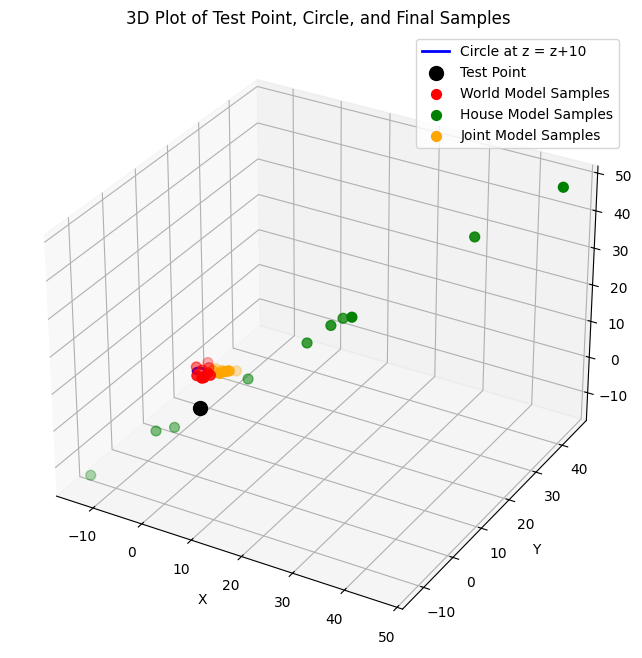

In [ ]:
test_point = test[14]

# generate samples
# World Model
final_samples_world, all_samples_world = sample_generate(model_world1, nsamples=10, x = test_point[0], y = test_point[1], z = test_point[2], yfeatures=3)

# House Model
final_samples_house, all_samples_house = sample_generate(model_house, nsamples=10, x = test_point[0], y = test_point[1], z = test_point[2], yfeatures=3)

# Joint Model
final_samples_joint, all_samples_joint = sample_joint_generate(model_house, model_world1, nsamples = 10, x = test_point[0], y = test_point[1], z = test_point[2],
                                                               yfeatures = 3)

# for creating a responsive plot
%matplotlib inline

from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Circle parameters
radius = 1  # radius of the circle
center = np.array([test_point[0], test_point[1], test_point[2] + 10])  # center of the circle (x, y, z+10)
num_points = 100  # number of points to approximate the circle

# Generate circle points at z = z + 10
angles = np.linspace(0, 2 * np.pi, num_points)
circle_x = center[0] + radius * np.cos(angles)
circle_y = center[1] + radius * np.sin(angles)
circle_z = np.full_like(angles, center[2])  # Same z value for all points (z + 10)

# Plotting the results
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the circle (centered at (x, y, z+10) with radius 1)
ax.plot(circle_x, circle_y, circle_z, label='Circle at z = z+10', color='blue', linewidth=2)

# Plot the test point (x, y, z)
ax.scatter(test_point[0], test_point[1], test_point[2], color='black', label='Test Point', s=100)

# Plot the final samples from the World model (colored red)
ax.scatter(final_samples_world.cpu().numpy()[:, 0], final_samples_world.cpu().numpy()[:, 1], final_samples_world.cpu().numpy()[:, 2], color='red', label='World Model Samples', s=50)

# Plot the final samples from the House model (colored green)
ax.scatter(final_samples_house.cpu().numpy()[:, 0], final_samples_house.cpu().numpy()[:, 1], final_samples_house.cpu().numpy()[:, 2], color='green', label='House Model Samples', s=50)

# Plot the final samples from the Joint model (colored orange)
ax.scatter(final_samples_joint.cpu().numpy()[:, 0], final_samples_joint.cpu().numpy()[:, 1], final_samples_joint.cpu().numpy()[:, 2], color='orange', label='Joint Model Samples', s=50)
# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Plot of Test Point, Circle, and Final Samples')

# Add a legend
ax.legend()

# Show plot
plt.show()


In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()